# Neural Classification using Tensorflow.
1. There are several types of classifications, multicalss and multilabel. 


*   Multiclass- Is where there are several different objects to be classified.
*   Binary Class- Just has two different classs of objects.
*   Multilabel- Is where there are several different labels for the same object.

2. This processes is done by initailly taking the dimensions of the data, ex: image or text, and convert them into tensor. In the case of image width, height and color channels are taken into account. Hence the shape of the tensor would be like ``[224, 224, 3]``. 224x224 is WxH and 3 is the R,G,B matrix of the image. 

3. Furthermore, this numerical encoded data is given as imput to the model to predit the multiple ouputs and the label having the maximum value is taken as the classified label of the given object.



## Typical architecture of a classification neural network 

The word *typical* is on purpose.

Because the architecture of a classification neural network can widely vary depending on the problem you're working on.

However, there are some fundamentals all deep neural networks contain:
* An input layer.
* Some hidden layers.
* An output layer.

Much of the rest is up to the data analyst creating the model.

The following are some standard values you'll often use in your classification neural networks.

| **Hyperparameter** | **Binary Classification** | **Multiclass classification** |
| --- | --- | --- |
| Input layer shape | Same as number of features (e.g. 5 for age, sex, height, weight, smoking status in heart disease prediction) | Same as binary classification |
| Hidden layer(s) | Problem specific, minimum = 1, maximum = unlimited | Same as binary classification |
| Neurons per hidden layer | Problem specific, generally 10 to 100 | Same as binary classification |
| Output layer shape | 1 (one class or the other) | 1 per class (e.g. 3 for food, person or dog photo) |
| Hidden activation | Usually [ReLU](https://www.kaggle.com/dansbecker/rectified-linear-units-relu-in-deep-learning) (rectified linear unit) | Same as binary classification |
| Output activation | [Sigmoid](https://en.wikipedia.org/wiki/Sigmoid_function) | [Softmax](https://en.wikipedia.org/wiki/Softmax_function) |
| Loss function | [Cross entropy](https://en.wikipedia.org/wiki/Cross_entropy#Cross-entropy_loss_function_and_logistic_regression) ([`tf.keras.losses.BinaryCrossentropy`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/BinaryCrossentropy) in TensorFlow) | Cross entropy ([`tf.keras.losses.CategoricalCrossentropy`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy) in TensorFlow) |
| Optimizer | [SGD](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD) (stochastic gradient descent), [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) | Same as binary classification |

***Table 1:*** *Typical architecture of a classification network.* ***Source:*** *Adapted from page 295 of [Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow Book by Aurélien Géron](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)*
=

In [ ]:
# Using Scikit learn make_circle dataset to create a binary classification
import tensorflow as tf
import numpy as np
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples, noise = 0.03, random_state= 42)

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

The `make_circles` function is used to creat co-ordinates such a way that these would create inner and outer circles. This is used to learn classification. `X` contains two axis (x-axis and y-axis) and the `y` contains the label of the circles.

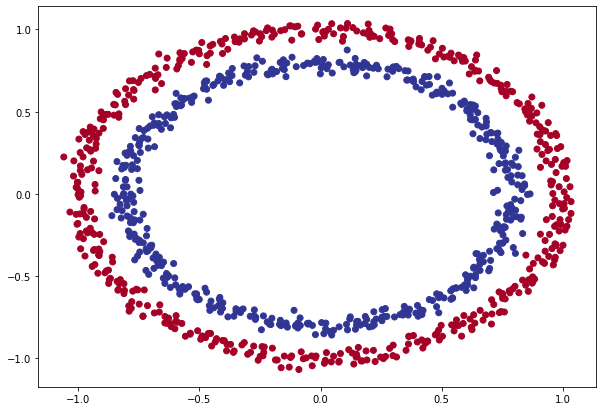

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [ ]:
import pandas as pd
circles = pd.DataFrame({'X0' : X[:,0], 'X1' : X[:, 1], 'label':y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


In [ ]:
circles.describe()

,X0,X1,label
count,1000.000000,1000.000000,1000.00000
mean,-0.000448,-0.000804,0.50000
std,0.639837,0.641156,0.50025
min,-1.059502,-1.067768,0.00000
25%,-0.619251,-0.612176,0.00000
50%,0.008762,-0.003949,0.50000
75%,0.621933,0.624822,1.00000
max,1.033712,1.036004,1.00000


In [ ]:
tf.random.set_seed(42)
model_1= tf.keras.Sequential([
                              tf.keras.layers.Dense(1)
])
model_1.compile(
    loss = 'BinaryCrossentropy',
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
    metrics = ['accuracy']
)

history = model_1.fit(X, y, epochs = 10, verbose = 0)

In [ ]:
model_1.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.7059 - accuracy: 0.4940


[0.7059001326560974, 0.49399998784065247]

In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1),
                               tf.keras.layers.Dense(1),
])

model_2.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer =tf.keras.optimizers.Adam(learning_rate = 0.01),
    metrics = ['Accuracy']
)

history = model_2.fit(X, y, epochs=20, verbose =0)

In [ ]:
model_2.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6932 - Accuracy: 0.4320


[0.6931833028793335, 0.4320000112056732]

## Solution-1:
> It became evident that no matter how many layers or changes made the model is still guessing. Hence, we need visualize what the model is actually doing.
* The below function is defined in such a way that, it takes the min and max values of the co-ordinates and then makes a equal splits of size 100 between the min and max values of each co-ordinates, using `np.linspace`.
* Then using the meshgrid, an N-Dim array is been created.
* In the case of `xx` arrays of equal split are continously stacked one over the other 100 times and in the case of `yy` 100 different arrays each array consisting same element 100 times. Where the elements are taken by the index of `linspace`. 
* Using ravel, these stacks are converting into single array and then matched beside one another like a dataframe using `np.c_[]`. This is done inorder to allow the model to take the input for the prediction.
* Then the model is predicted based on the input vlaues from the early step.
* After the prediction based on the `z-value` for coressponding `x-value and y-value` a contourf plot is drawn to visualise the models output.*italicised text*


In [ ]:
def plot_decision_boundary(model, X, y):
  
  
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
 
  x_in = np.c_[xx.ravel(), yy.ravel()]
  

  y_pred = model.predict(x_in)

  
  
  print("Doing binary classifcation...")
  y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)
  
  
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

Doing binary classifcation...


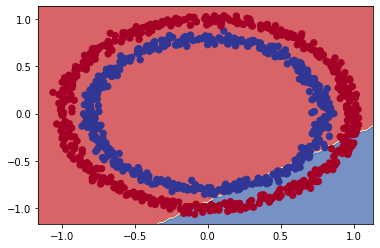

In [ ]:
plot_decision_boundary(model_2, X, y)

In [ ]:

tf.random.set_seed(42)


model_3 = tf.keras.Sequential([
  
  tf.keras.layers.Dense(100), 
  tf.keras.layers.Dense(10), 
  tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(), 
                metrics=['accuracy'])

model_3.fit(X, y, epochs=100, verbose=0) 

Doing binary classifcation...


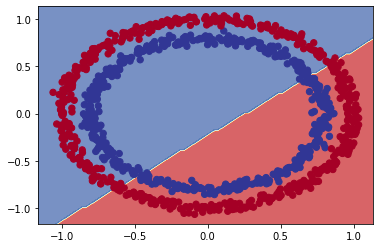

In [ ]:
plot_decision_boundary(model_3, X, y)

In [ ]:
# Set random seed
tf.random.set_seed(42)


model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 1, 4 neurons, ReLU activation
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 2, 4 neurons, ReLU activation
  tf.keras.layers.Dense(1) # ouput layer
])


model_4.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.001), # Adam's default learning rate is 0.001
                metrics=['accuracy'])


history = model_4.fit(X, y, epochs=100, verbose=0)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Doing binary classifcation...


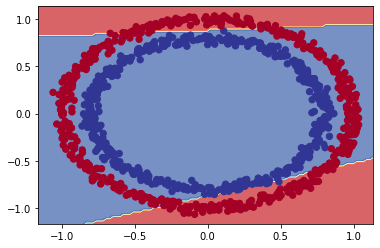

In [ ]:
plot_decision_boundary(model_4, X, y)

##Summary-1:
It became evident that no matter the layers or the activation function, the model is not yet capable of classification.
* Currently there are of 3 types of classifications that I learnt.
  1. Linear: It just gives an as it is output from the input.
  2. Relu (non-linear): Just removes the negative values from the input.
  3. Sigmoid (non-linear): The larger the input (more positive), the closer the output value will be to 1.0, whereas the smaller the input (more negative), the closer the output will be to 0.0. Hence, a curve.


In [ ]:
tf.random.set_seed(42)

model_5= tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 1, ReLU activation
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 2, ReLU activation
  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid) # ouput layer, sigmoid activation
])

model_5.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history = model_5.fit(X, y, epochs=100, verbose=0)

Doing binary classifcation...


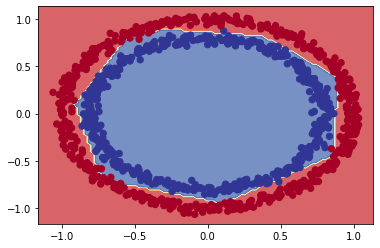

In [ ]:
plot_decision_boundary(model_5, X, y)

In [ ]:
tf.random.set_seed(42)

model_6= tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation=tf.keras.activations.relu), # hidden layer 1, ReLU activation
  tf.keras.layers.Dense(100, activation=tf.keras.activations.relu), # hidden layer 1, ReLU activation
  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid) # ouput layer, sigmoid activation
])

model_6.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
                metrics=['accuracy'])

history = model_6.fit(X, y, epochs=10, verbose=0)

Doing binary classifcation...


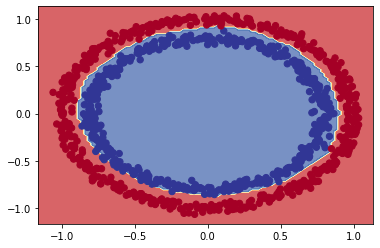

In [ ]:
plot_decision_boundary(model_6, X, y)

In [ ]:
model_6.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.0238 - accuracy: 0.9930


[0.023794056847691536, 0.9929999709129333]

##Summary-2:
Hence, the idea was true, with the given basic linear functions the model wasn't able to draw the curves between the classification circles. But with the help of sigmoid model model was successful.

**Remember** 
* sigmoid activation is only used for binary classification.
* for multi-class problem softmax activation is required.

Now making the model the professional way.

In [ ]:
X_train, y_train = X[:800], y[:800] # 80% - training set
X_test, y_test = X[800:], y[800:] # 20% - test set

In [ ]:
tf.random.set_seed(42)

model_7 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"), 
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid") 
])

model_7.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), 
                metrics=['accuracy'])

history = model_7.fit(X_train, y_train, epochs=25, verbose = 0)

In [ ]:
loss, accuracy = model_7.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

7/7 [==============================] - 0s 3ms/step - loss: 0.1247 - accuracy: 1.0000
Model loss on the test set: 0.12468845397233963
Model accuracy on the test set: 100.00%


Doing binary classifcation...
Doing binary classifcation...


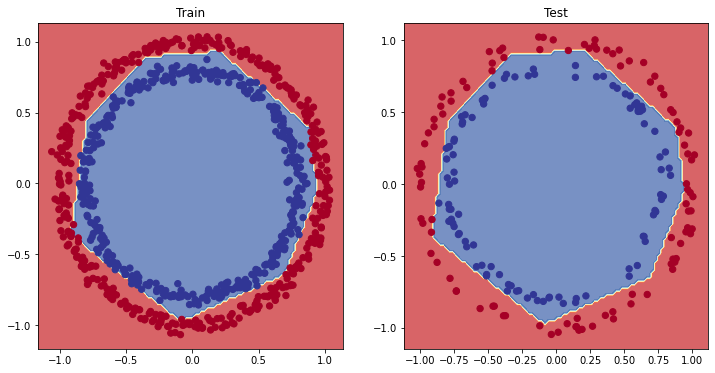

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_7, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_7, X=X_test, y=y_test)
plt.show()

In [ ]:
pd.DataFrame(history.history)

,loss,accuracy
0,0.684651,0.54250
1,0.677721,0.55250
2,0.673595,0.55125
3,0.668149,0.57750
4,0.663269,0.58500
5,0.654567,0.58375
6,0.641257,0.67500
7,0.626428,0.70125
8,0.603831,0.74875
9,0.571404,0.77375


Text(0.5, 1.0, 'Model_7 training curves')

<Figure size 720x504 with 0 Axes>

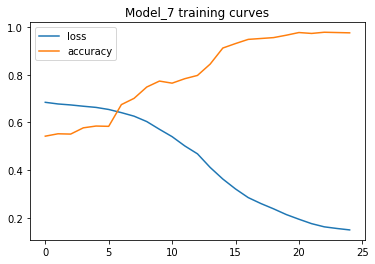

In [ ]:
# Plot the loss curves
plt.figure(figsize = (10,7))
pd.DataFrame(history.history).plot()
plt.title("Model_7 training curves")

### lr_scheduler
1. The callbacks is the other peice in the creating the neural network.
2. The learning rate in the callback will get dynamically adjusted based on the equation provided in the callbacks.
3. This helps in determine the precise point where the accuracy of the model is imporving.

In [ ]:
tf.random.set_seed(42)

model_8 = tf.keras.Sequential([ 
                               tf.keras.layers.Dense(4, activation = 'relu'),
                               tf.keras.layers.Dense(4, activation = 'relu'),
                               tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model_8.compile(loss = 'binary_crossentropy',
                optimizer = 'Adam',
                metrics = ['Accuracy'])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))
history_8 = model_8.fit(X_train, y_train, epochs = 100, callbacks = [lr_scheduler], verbose = 1)

Epoch 1/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6945 - Accuracy: 0.4988 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6938 - Accuracy: 0.4975 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6930 - Accuracy: 0.4963 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6922 - Accuracy: 0.4975 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6914 - Accuracy: 0.5063 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6906 - Accuracy: 0.5013 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6898 - Accuracy: 0.4950 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6889 - Accuracy: 0.5038 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

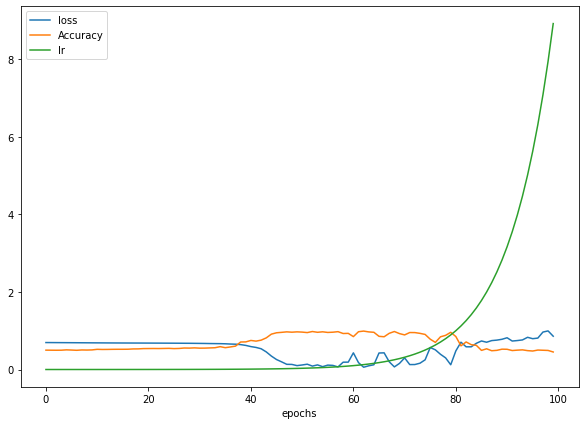

In [ ]:
pd.DataFrame(history_8.history).plot(figsize=(10,7), xlabel = "epochs")

###Observation

1. It can be observed that as the learning rate is being increased exponentially, the accuray has a raise until a certain point and then the accuracy of the model fell.
2. Hence, by this experiment, we should find the value of lr at which the accuracy is the highest and the loss is the lowest. 

Text(0.5, 1.0, 'Learning rate vs Loss')

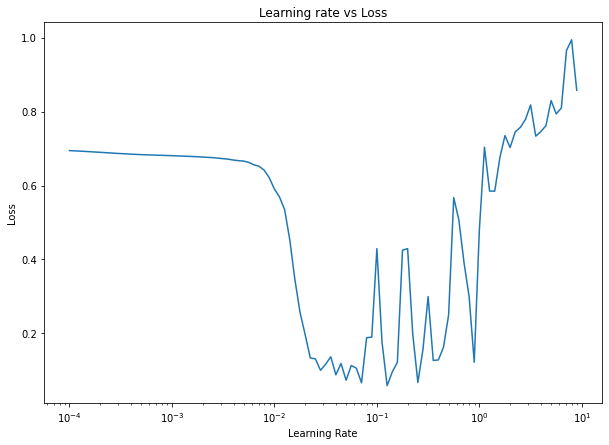

In [ ]:
lr_s = 1e-4 * (10**(np.arange(100)/20))
plt.figure(figsize = (10,7))
plt.semilogx(lr_s, history_8.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs Loss")

In [ ]:
model_8_pd = pd.DataFrame(history_8.history)
model_8_pd 

,loss,Accuracy,lr
0,0.694489,0.49875,0.000100
1,0.693771,0.49750,0.000112
2,0.693004,0.49625,0.000126
3,0.692244,0.49750,0.000141
4,0.691439,0.50625,0.000158
...,...,...,...
95,0.793832,0.47625,5.623413
96,0.809521,0.50125,6.309574
97,0.964967,0.49625,7.079458
98,0.994151,0.49125,7.943282


In [ ]:
min(model_8_pd["loss"])

0.058510832488536835

In [ ]:
model_8_pd[model_8_pd['loss']==min(model_8_pd["loss"])].index.values

array([62])

In [ ]:
model_8_pd["lr"][62]

0.12589253

In [ ]:
tf.random.set_seed(42)

model_9 = tf.keras.Sequential([ 
                               tf.keras.layers.Dense(4, activation = 'relu'),
                               tf.keras.layers.Dense(4, activation = 'relu'),
                               tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model_9.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(lr = 0.12589253),
                metrics = ['Accuracy'])


history_9 = model_9.fit(X_train, y_train, epochs = 25, verbose = 1)

Epoch 1/25


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


25/25 [==============================] - 0s 3ms/step - loss: 0.6598 - Accuracy: 0.5863
Epoch 2/25
25/25 [==============================] - 0s 3ms/step - loss: 0.5667 - Accuracy: 0.6963
Epoch 3/25
25/25 [==============================] - 0s 3ms/step - loss: 0.4650 - Accuracy: 0.7875
Epoch 4/25
25/25 [==============================] - 0s 3ms/step - loss: 0.2875 - Accuracy: 0.8913
Epoch 5/25
25/25 [==============================] - 0s 3ms/step - loss: 0.1602 - Accuracy: 0.9588
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.1519 - Accuracy: 0.9438
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.0961 - Accuracy: 0.9663
Epoch 8/25
25/25 [==============================] - 0s 3ms/step - loss: 0.0638 - Accuracy: 0.9787
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.0493 - Accuracy: 0.9875
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.0675 - Accuracy: 0.9775
Epoch 11/25
25/25 [===========

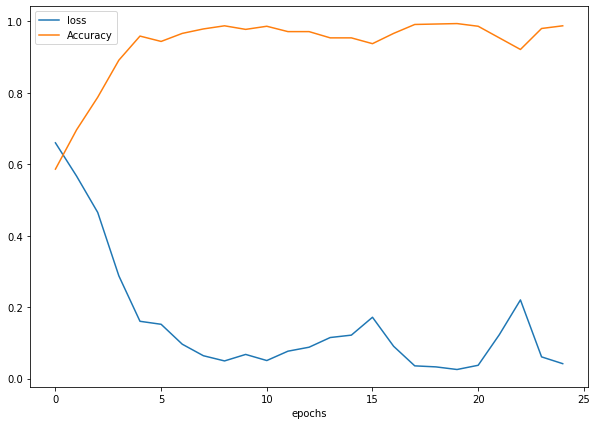

In [ ]:
model_9_pd  = pd.DataFrame(history_9.history)
model_9_pd.plot(figsize = (10,7), xlabel = "epochs")

In [ ]:
loss, accuracy = model_9.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

7/7 [==============================] - 0s 3ms/step - loss: 0.0243 - Accuracy: 0.9950
Model loss on the test set: 0.024345608428120613
Model accuracy on the test set: 99.50%


Doing binary classifcation...
Doing binary classifcation...


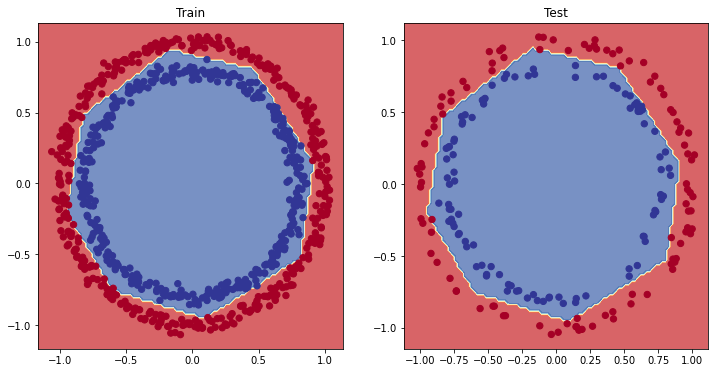

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_9, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_9, X=X_test, y=y_test)
plt.show()

##Summary-3


> Using the callbacks, the process of finding the perfect learning rate became very efficient.

> * Use this  algorithim to find the best suitable lr for the model.
    * First : `lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))`
    * Then use the `callbacks = [lr_scheduler]` parameter in the `model.fit`.
    * Analyse the loss, accuracy and the learning rate graph.
    * Find the min loss and max accuracy indexes and the corresponding learning rate value.
    * Use this value in the next model and hence obtianing the highest accuracy.



## Evaluation Metrics:

> Alongside the visualizing principle, it is also necessary to track the evaluation metrics of model. They are as follows:
1. Accuracy
2. Precision: Keeps track of false positives
3. Recall: Keeps track of false negatives
4. F1-Score: Is the combination of the above
5. Confusion Matrix
6. Classification Report

> There are certain trade offs:
1. Accuracy can't be used for non-balanced classes
2. Presion and recall both can't be high.


In [ ]:
#loss and accuracy 
loss, accuracy = model_9.evaluate(X_test, y_test)
print(f'Model loss on the test set: {loss}')
print(f'Model accuracy on the test set: {(accuracy*100):.2f}')

7/7 [==============================] - 0s 3ms/step - loss: 0.0243 - Accuracy: 0.9950
Model loss on the test set: 0.024345608428120613
Model accuracy on the test set: 99.50


In [ ]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
y_preds = model_9.predict(X_test)

y_test[:10], y_preds[:10]


(array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0]), array([[9.3642414e-01],
        [9.9805534e-01],
        [9.9805534e-01],
        [9.9805534e-01],
        [1.6857393e-01],
        [9.1581460e-05],
        [9.9713564e-01],
        [1.9738442e-04],
        [9.9805534e-01],
        [2.8503397e-05]], dtype=float32))

> Since the output of the sigmoid is not as `y_test`, hence they should be converted to the `y_test` form.

In [ ]:
cnf_matrix = confusion_matrix(y_test, tf.round(y_preds))

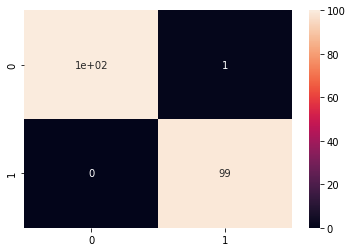

In [ ]:
import seaborn as sns
sns.heatmap(cnf_matrix, annot=True)


# **Multi-Class** Classification
When there are more than two classes as an option, it's known as **multi-class classification**. No matter how many classes there are this approach can be used.


In [ ]:
from tensorflow.keras.datasets import fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [ ]:
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

(28, 28) ()
The label of the image is 9


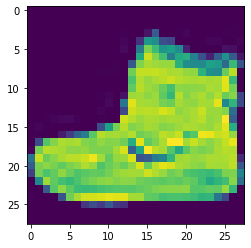

In [ ]:
import matplotlib.pyplot as plt
print(train_data[0].shape, train_labels[0].shape)
print(f'The label of the image is {train_labels[0]}')
plt.imshow(train_data[0])

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
              
len(class_names)

10

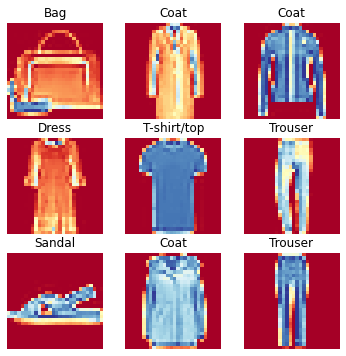

In [ ]:
import random
plt.figure(figsize=(6,6))
for i in range(9):
  plt.subplot(3,3,i+1)
  random_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[random_index], cmap = plt.cm.RdYlBu)
  plt.title(class_names[train_labels[random_index]])
  plt.axis(False)

In [ ]:
train, test = tf.one_hot(train_labels, depth = 10), tf.one_hot(test_labels, depth = 10)
train[0], test[0]

(<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)>)

In [ ]:
tf.random.set_seed(42)
model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')

])

model_12.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ['accuracy'])
model_12_history = model_12.fit(
    train_data,
    train,
    epochs = 10,
    validation_data = (test_data, test)
)



Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3695 - accuracy: 0.1634 - val_loss: 1.7450 - val_accuracy: 0.2613
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.6305 - accuracy: 0.3122 - val_loss: 1.5679 - val_accuracy: 0.3481
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5406 - accuracy: 0.3495 - val_loss: 1.5273 - val_accuracy: 0.3492
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5136 - accuracy: 0.3560 - val_loss: 1.4946 - val_accuracy: 0.3646
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.4992 - accuracy: 0.3611 - val_loss: 1.4871 - val_accuracy: 0.3645
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.4896 - accuracy: 0.3638 - val_loss: 1.5161 - val_accuracy: 0.3773
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.3080 - accuracy: 0.4405 - val_loss: 1.2509 - val_accuracy:

In [ ]:
tf.random.set_seed(42)

# Create the model
model_11 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784, the Flatten layer does this for us)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classifcation
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
non_norm_history = model_11.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels)) # see how the model performs on the test set during training


Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.1745 - accuracy: 0.1593 - val_loss: 1.8063 - val_accuracy: 0.2076
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.7091 - accuracy: 0.2473 - val_loss: 1.6547 - val_accuracy: 0.2822
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6348 - accuracy: 0.2790 - val_loss: 1.6129 - val_accuracy: 0.2757
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6100 - accuracy: 0.2856 - val_loss: 1.6114 - val_accuracy: 0.2896
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.6035 - accuracy: 0.2950 - val_loss: 1.8733 - val_accuracy: 0.2815
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.5936 - accuracy: 0.3038 - val_loss: 1.5717 - val_accuracy: 0.3132
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.5764 - accuracy: 0.3217 - val_loss: 1.5686 - val_accuracy:

In [ ]:
model_11.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_11 (Flatten)        (None, 784)               0         
                                                                 
 dense_83 (Dense)            (None, 4)                 3140      
                                                                 
 dense_84 (Dense)            (None, 4)                 20        
                                                                 
 dense_85 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


## Things to consider in **Multi-class** Classification:
1. The input shape must be flattend to give as an input to the neuron.
2. The activation funtion of the output layer should be `softmax`.
3. The activation must be `CategoricalCrossentropy`.
4. The labels or the target value must be either one hot encoded or the loss function must be `tf.keras.losses.SparseCategoricalCrossentropy()`

In [ ]:
train_data.min(), train_data.max()


(0, 255)

In [ ]:

train_data = train_data / 255.0
test_data = test_data / 255.0

train_data.min(), train_data.max()

(0.0, 1.0)

In [ ]:
tf.random.set_seed(42)

model_13 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), 
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") 
])

model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

model_13_history = model_13.fit(train_data,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

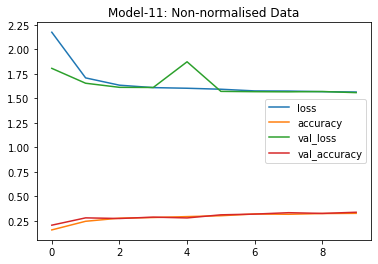

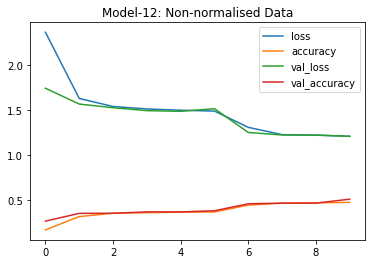

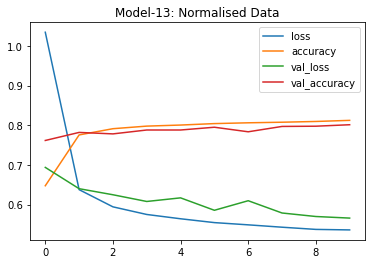

In [ ]:
import pandas as pd

pd.DataFrame(non_norm_history.history).plot(title= "Model-11: Non-normalised Data")
pd.DataFrame(model_12_history.history).plot(title = "Model-12: Non-normalised Data")
pd.DataFrame(model_13_history.history).plot(title= "Model-13: Normalised Data")

## Summary-4
1. It can be observed that normalizing the data has a huge impact on the accuracy of the model. 
2. But while comparision it is important to is the smae metrics to compare the models. Because if the normalised model is used on the non-normalised dataset then the results would quite drastic. 
> Hence, these things should be carefully considered.

## Using `lr_scheduler` improving the accuracy:

In [ ]:
tf.random.set_seed(42)

model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])

model_14.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics =['accuracy']
)
lr_scheduler_14 = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

model_14_history = model_14.fit(train_data,
                               train_labels,
                               epochs=40, 
                               validation_data=(test_data, test_labels),
                               callbacks=[lr_scheduler_14])

Epoch 1/40
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 5s

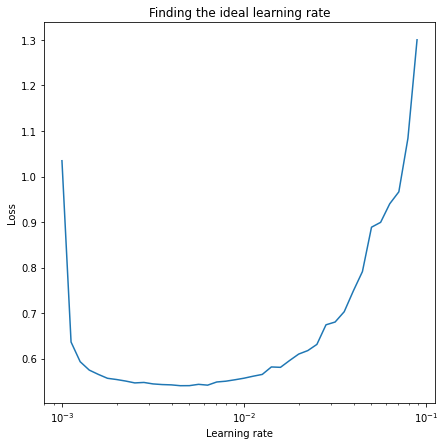

In [ ]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(7,7))
lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, model_14_history.history["loss"]) # want the x-axis to be log-scale
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

In [ ]:

lrs[model_14_history.history['loss'].index(min(model_14_history.history['loss']))], lrs[12]

(0.004466835921509632, 0.0039810717055349725)

In [ ]:
tf.random.set_seed(42)
model_15 =tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = "softmax")
])

model_15.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(lr = 0.003),
    metrics = ['accuracy']
)

model_15_history = model_15.fit(train_data,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data, test_labels)
)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1875/1875 [==============================] - 5s 3ms/step - loss: 1.5778 - accuracy: 0.3097 - val_loss: 1.4557 - val_accuracy: 0.3699
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.4194 - accuracy: 0.3788 - val_loss: 1.3403 - val_accuracy: 0.4180
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.2837 - accuracy: 0.4399 - val_loss: 1.2650 - val_accuracy: 0.4493
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0499 - accuracy: 0.5490 - val_loss: 0.8911 - val_accuracy: 0.6243
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.8562 - accuracy: 0.6284 - val_loss: 0.8680 - val_accuracy: 0.6348
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.8397 - accuracy: 0.6356 - val_loss: 0.8750 - val_accuracy: 0.6273
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8327 - accuracy: 0.6388 - val_loss: 0.8598 - val_accuracy: 0.6337
Epo

In [ ]:
tf.random.set_seed(42)
model_16 =tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = "softmax")
])

model_16.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(lr = 0.0015),
    metrics = ['accuracy']
)

model_16_history = model_16.fit(train_data,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data, test_labels)
)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0062 - accuracy: 0.6579 - val_loss: 0.7105 - val_accuracy: 0.7455
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6488 - accuracy: 0.7654 - val_loss: 0.6441 - val_accuracy: 0.7737
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5974 - accuracy: 0.7829 - val_loss: 0.6321 - val_accuracy: 0.7717
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5743 - accuracy: 0.7941 - val_loss: 0.5913 - val_accuracy: 0.7937
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5575 - accuracy: 0.8040 - val_loss: 0.6081 - val_accuracy: 0.7922
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5448 - accuracy: 0.8081 - val_loss: 0.5966 - val_accuracy: 0.7914
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5381 - accuracy: 0.8101 - val_loss: 0.5711 - val_accuracy:

In [ ]:
tf.random.set_seed(42)
model_17 =tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = "softmax")
])

model_17.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(lr = 0.0015),
    metrics = ['accuracy']
)

model_17_history = model_17.fit(train_data,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data, test_labels)
)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5020 - accuracy: 0.8169 - val_loss: 0.4411 - val_accuracy: 0.8379
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3795 - accuracy: 0.8605 - val_loss: 0.4760 - val_accuracy: 0.8441
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3474 - accuracy: 0.8722 - val_loss: 0.4279 - val_accuracy: 0.8386
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3258 - accuracy: 0.8805 - val_loss: 0.3724 - val_accuracy: 0.8699
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3086 - accuracy: 0.8862 - val_loss: 0.3708 - val_accuracy: 0.8684
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2957 - accuracy: 0.8908 - val_loss: 0.3834 - val_accuracy: 0.8603
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2863 - accuracy: 0.8926 - val_loss: 0.3774 - val_accuracy:

In [ ]:
y_pred = model_17.predict(test_data)
y_pred[0]

array([2.1912223e-08, 9.5095984e-08, 3.3085367e-08, 8.4104904e-08,
       2.4185326e-08, 1.6424628e-02, 4.9422766e-07, 1.1540800e-02,
       3.5212909e-06, 9.7203034e-01], dtype=float32)

In [ ]:
tf.argmax(y_pred[0]).numpy(), class_names[tf.argmax(y_pred[0])]

(9, 'Ankle boot')

In [ ]:
y_pred = tf.argmax(y_pred, axis = 1)
y_pred[0]

<tf.Tensor: shape=(), dtype=int64, numpy=9>

In [ ]:
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

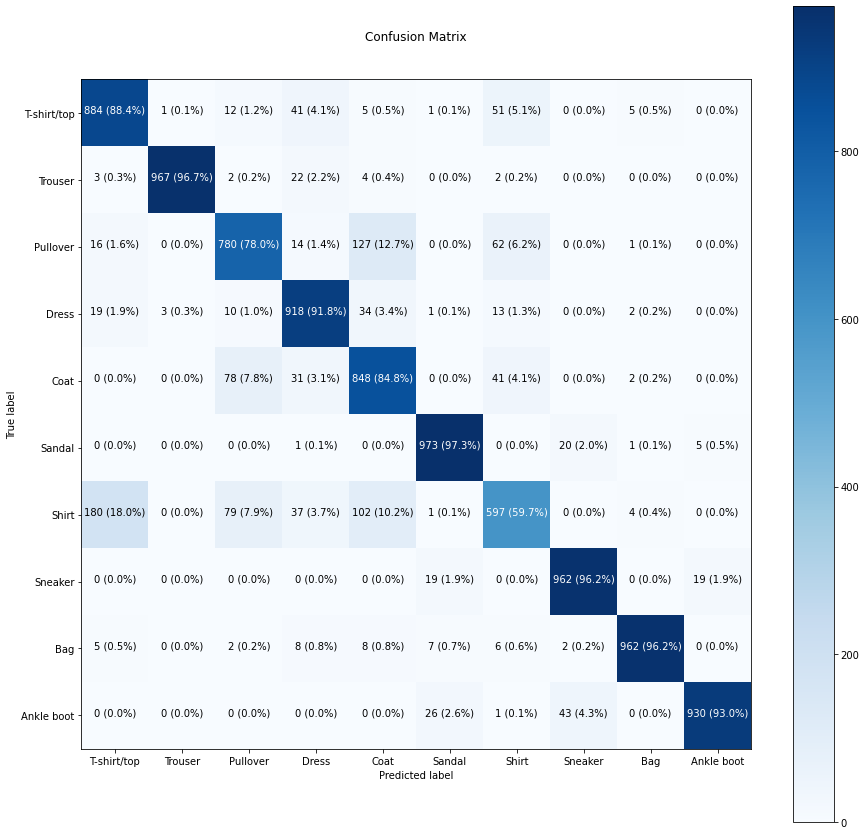

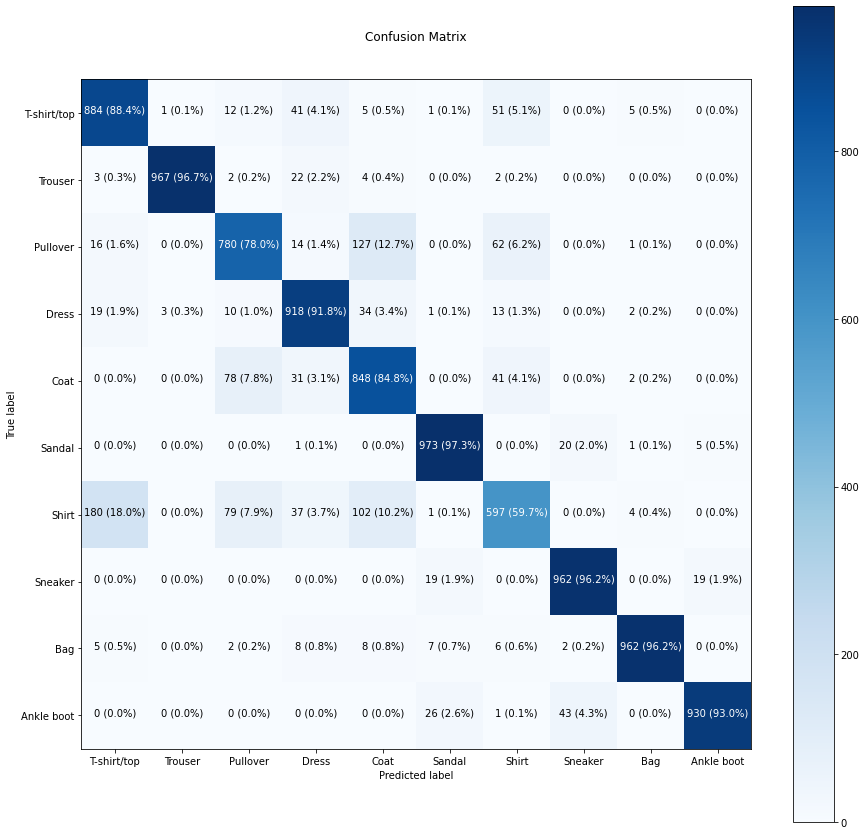

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels, 
                 y_pred=y_pred)
make_confusion_matrix(y_true=test_labels, 
                      y_pred=y_pred,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

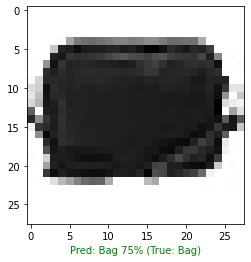

In [ ]:
import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.
  
  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """ 
  # Setup random integer
  i = random.randint(0, len(images))
  
  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red
# Check out a random image as well as its prediction
plot_random_image(model=model_14, 
                  images=test_data, 
                  true_labels=test_labels, 
                  classes=class_names)

In [ ]:
model_14.layers

In [ ]:
weights, biases = model_14.layers[1].get_weights()

# Shape = 1 weight matrix the size of our input data (28x28) per neuron (4)
weights, weights.shape

(array([[  3.4696457 ,  -5.6096554 ,   6.522786  , -15.350247  ],
        [ -9.630422  ,   4.511723  ,  12.087924  ,   3.095517  ],
        [ 10.021514  ,   0.4289128 ,   5.0643473 , -16.376463  ],
        ...,
        [ -2.5268843 ,  13.401629  ,   0.8063933 ,  -0.16330585],
        [-10.984647  ,  13.4962635 ,   5.175327  ,   6.3372188 ],
        [ -5.2270555 ,  -5.0106473 ,   7.825469  ,  -4.140139  ]],
       dtype=float32), (784, 4))

In [ ]:
biases, biases.shape

(array([ 5.13749 , 16.653635, -5.148827, 16.624897], dtype=float32), (4,))